In [1]:
!pip install Kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Importing Dataset from Kaggle

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:06<00:00, 32.8MB/s]
100% 163M/163M [00:06<00:00, 28.2MB/s]


In [4]:
from zipfile import ZipFile
data = '/content/face-mask-dataset.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()

In [5]:
!ls

data   face-mask-dataset.zip  sample_data
drive  kaggle.json	      shutterstock_1742084420.jpg


# Importing Libraries

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Data Importing and Preprocessing

In [7]:
#Make a list of images with mask
face_with_mask = os.listdir('/content/data/with_mask')
#Make a list of images without mask
face_without_mask = os.listdir('/content/data/without_mask')

In [8]:
print(face_with_mask[0:5])
print(face_without_mask[0:5])

['with_mask_1947.jpg', 'with_mask_2733.jpg', 'with_mask_3611.jpg', 'with_mask_1392.jpg', 'with_mask_907.jpg']
['without_mask_2936.jpg', 'without_mask_2717.jpg', 'without_mask_1757.jpg', 'without_mask_3475.jpg', 'without_mask_131.jpg']


In [9]:
print('Number of images with mask:', len(face_with_mask))
print('Number of images without mask:', len(face_without_mask))

Number of images with mask: 3725
Number of images without mask: 3828


In [10]:
#Creating labels for the two classes
with_mask_label = [1]*len(face_with_mask)
without_mask_label = [0]*len(face_without_mask)

In [11]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
labels = with_mask_label + without_mask_label

print(len(labels))

7553


# Image Preprocessing
* Resize images
* Convert Images to NumPy arrays

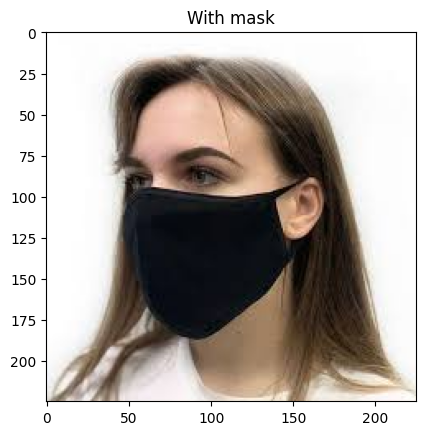

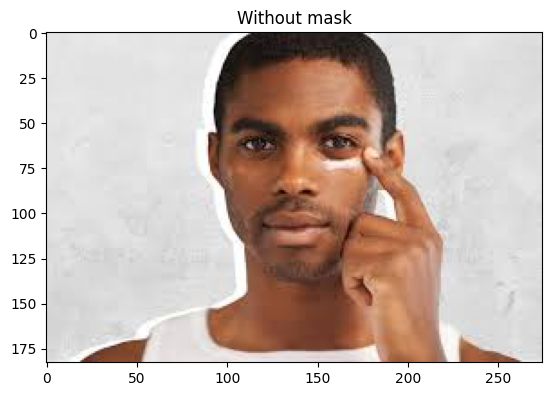

In [ ]:
#Displaying some of the images with mask and without mask
mask_img = mpimg.imread('/content/data/with_mask/with_mask_2310.jpg') #Reads the image in the form of numpy array
img = plt.imshow(mask_img)
plt.title('With mask')
plt.show()

nomask_img = mpimg.imread('/content/data/without_mask/without_mask_2507.jpg') #Reads the image in the form of numpy array
img = plt.imshow(nomask_img)
plt.title('Without mask')
plt.show()

In [ ]:
#Image Processing, Resizing and converting to numpy array and storing in a list 'dataset'.
with_mask_path = '/content/data/with_mask/'

dataset = []

for img_file in face_with_mask:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))  #resize the image in 128 x 128 size
  image = image.convert('RGB')  #Convert all the images to RGB colour channel
  image = np.array(image)    #Converting the iages into numpy array
  dataset.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in face_without_mask:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))  #resize the image in 128 x 128 size
  image = image.convert('RGB')  #Convert all the images to RGB colour channel
  image = np.array(image)    #Converting the iages into numpy array
  dataset.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
dataset[0]

array([[[50, 58, 31],
        [47, 56, 34],
        [57, 60, 43],
        ...,
        [32, 33, 27],
        [28, 34, 20],
        [35, 41, 11]],

       [[49, 56, 32],
        [49, 58, 36],
        [58, 62, 39],
        ...,
        [31, 31, 21],
        [30, 37, 25],
        [31, 41, 17]],

       [[50, 57, 36],
        [50, 59, 37],
        [58, 62, 34],
        ...,
        [44, 40, 26],
        [27, 33, 25],
        [18, 30, 12]],

       ...,

       [[64, 74, 39],
        [68, 78, 43],
        [72, 82, 48],
        ...,
        [10,  9,  5],
        [18, 17, 12],
        [23, 22, 17]],

       [[57, 70, 33],
        [60, 71, 39],
        [66, 74, 48],
        ...,
        [15, 14, 11],
        [15, 13, 11],
        [15, 10,  9]],

       [[53, 68, 30],
        [54, 66, 38],
        [59, 65, 44],
        ...,
        [18, 17, 16],
        [17, 13, 12],
        [18, 11, 11]]], dtype=uint8)

In [ ]:
dataset[0].shape

(128, 128, 3)

In [ ]:
len(dataset)

7553

* List dataset contains 7553 images in the form of numpy arrays.

In [ ]:
#Converting list dataset and lables into numpy array
x = np.array(dataset)
y = np.array(labels)

print('type of dataset:',type(x))
print('type of labels:',type(y))

type of dataset: <class 'numpy.ndarray'>
type of labels: <class 'numpy.ndarray'>


In [ ]:
print('shape of images',x.shape)
print('shape of labels',y.shape)

shape of images (7553, 128, 128, 3)
shape of labels (7553,)


# Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(7553,) (6042,) (1511,)


In [ ]:
#Pixel Normalisation of the training and testing images
x_train_scaled = x_train/255
x_test_scaled = x_test/255

* Now the pixel values of all the images lies between 0 and 1

# Building Neural Netwrok Architecture

In [ ]:
classes = 2

model = keras.Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu',input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #ANN

#Dense layers start with 128 neurons in the first layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))  #Dropout layer prevents overfitting

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))

#Output layer
model.add(Dense(classes, activation = 'sigmoid'))  #Binary classification for mask and no mask

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

# MobileNet Architecture

In [ ]:
#Load the MobileNet Model
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
mobilenet_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [ ]:
#Freesing the remaining layers of the MobileNet so that they do not trained during backpropogation
for layers in mobilenet_model.layers:
  layers.trainable = False

In [ ]:
#adding the top layer in pre trained MobileNetV2
mobilenet_model = Sequential([
    mobilenet_model,
    Flatten(),
    Dense(classes, activation='sigmoid')
])

# Model Training

* Custome Model Training

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(x_train_scaled,y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data=(x_test_scaled, y_test),
                    validation_split=0.1,
                    )

Epoch 1/30
189/189 [==============================] - 18s 26ms/step - loss: 0.4781 - accuracy: 0.7837 - val_loss: 0.2596 - val_accuracy: 0.8954
Epoch 2/30
189/189 [==============================] - 4s 19ms/step - loss: 0.2939 - accuracy: 0.8825 - val_loss: 0.4336 - val_accuracy: 0.8709
Epoch 3/30
189/189 [==============================] - 4s 21ms/step - loss: 0.2264 - accuracy: 0.9129 - val_loss: 0.1841 - val_accuracy: 0.9239
Epoch 4/30
189/189 [==============================] - 4s 19ms/step - loss: 0.2031 - accuracy: 0.9212 - val_loss: 0.1955 - val_accuracy: 0.9252
Epoch 5/30
189/189 [==============================] - 3s 18ms/step - loss: 0.1614 - accuracy: 0.9396 - val_loss: 0.1886 - val_accuracy: 0.9351
Epoch 6/30
189/189 [==============================] - 4s 20ms/step - loss: 0.1377 - accuracy: 0.9508 - val_loss: 0.1848 - val_accuracy: 0.9298
Epoch 7/30
189/189 [==============================] - 4s 19ms/step - loss: 0.1104 - accuracy: 0.9633 - val_loss: 0.2438 - val_accuracy: 0.925

* Pre-trained MobileNetV2 model training

In [ ]:
#Model compilation
mobilenet_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#Training the model to 10 epochs
mobilenet_hist = mobilenet_model.fit(x_train_scaled,y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data = (x_test_scaled,y_test),
                    validation_split = 0.1
                    )

Epoch 1/10
189/189 [==============================] - 22s 57ms/step - loss: 0.1495 - accuracy: 0.9719 - val_loss: 0.2114 - val_accuracy: 0.9775
Epoch 2/10
189/189 [==============================] - 5s 27ms/step - loss: 0.0351 - accuracy: 0.9921 - val_loss: 0.1805 - val_accuracy: 0.9835
Epoch 3/10
189/189 [==============================] - 6s 31ms/step - loss: 0.0350 - accuracy: 0.9947 - val_loss: 0.2184 - val_accuracy: 0.9821
Epoch 4/10
189/189 [==============================] - 6s 29ms/step - loss: 0.0133 - accuracy: 0.9972 - val_loss: 0.2828 - val_accuracy: 0.9808
Epoch 5/10
189/189 [==============================] - 5s 28ms/step - loss: 0.0190 - accuracy: 0.9978 - val_loss: 0.2642 - val_accuracy: 0.9828
Epoch 6/10
189/189 [==============================] - 5s 26ms/step - loss: 0.0130 - accuracy: 0.9972 - val_loss: 0.2591 - val_accuracy: 0.9841
Epoch 7/10
189/189 [==============================] - 5s 26ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.2687 - val_accuracy: 0.982

# Model Evaluation

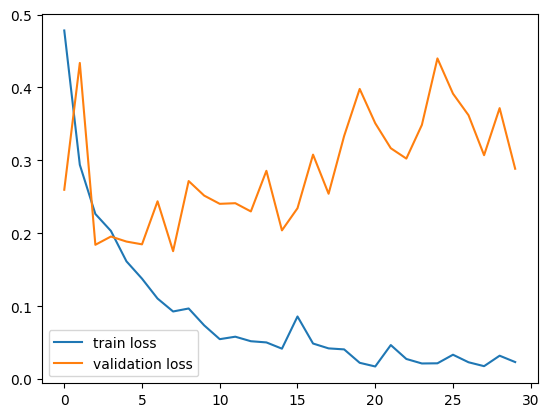

In [ ]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

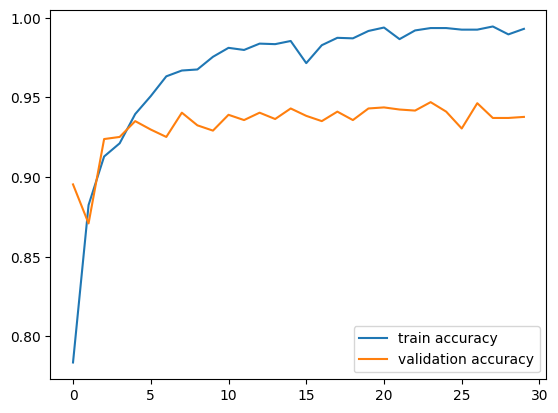

In [ ]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('face_mask_detector.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* MobileNet Model Evaluation

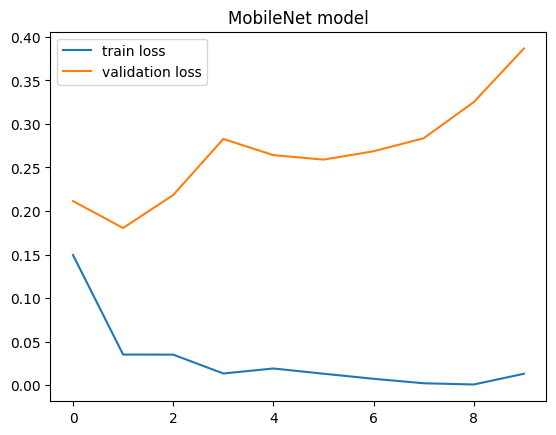

In [ ]:
plt.plot(mobilenet_hist.history['loss'], label = 'train loss')
plt.plot(mobilenet_hist.history['val_loss'], label = 'validation loss')
plt.title('MobileNet model')
plt.legend()
plt.show()

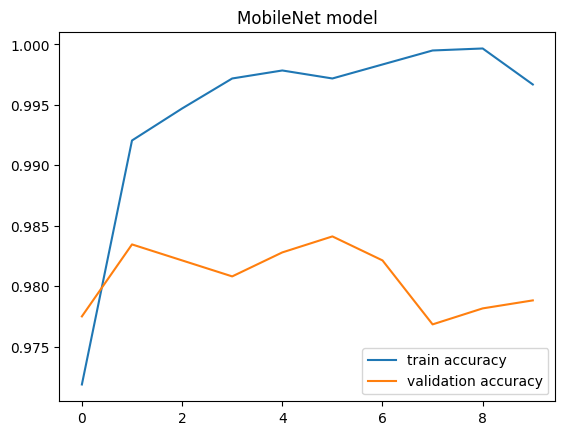

In [ ]:
plt.plot(mobilenet_hist.history['accuracy'], label = 'train accuracy')
plt.plot(mobilenet_hist.history['val_accuracy'], label = 'validation accuracy')
plt.title('MobileNet model')
plt.legend()
plt.show()

# Making Prediction

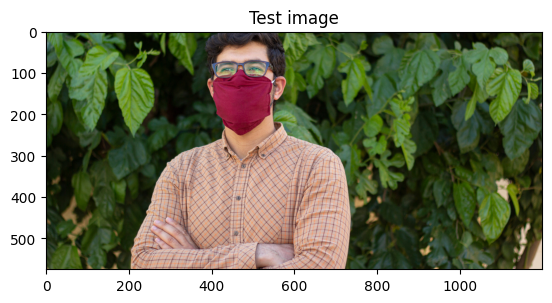

In [ ]:
#Visualising the test image
test_image = mpimg.imread('/content/shutterstock_1742084420.jpg')
img = plt.imshow(test_image)
plt.title('Test image')
plt.show()

In [ ]:
#Function to preprocess the image for prediction
def image_processing(image_path):
  input_image = cv2.imread(image_path)  #read image as numpy array
  input_image = cv2.resize(input_image, (128,128))  #resize the image with the input size of 128 x 128
  processed_img = input_image/255  #pixcel normalization
  processed_img = np.reshape(processed_img, [1,128,128,3])  #reshape the image for one i
  return processed_img

In [ ]:
image_path = '/content/shutterstock_1742084420.jpg'
processed_image = image_processing(image_path)

In [ ]:
#Making Prediction
prediction = mobilenet_model.predict(processed_image)
print(prediction)

pred_label = np.argmax(prediction)
print(pred_label)
if pred_label == 1:
  print('person is wearing the mask')
else:
  print('No mask')

In [ ]:
#Making Prediction (using MobileNet model)
prediction = mobilenet_model.predict(processed_image)
print(prediction)

pred_label = np.argmax(prediction)
print(pred_label)
if pred_label == 1:
  print('person is wearing the mask')
else:
  print('No mask')

1/1 [==============================] - 0s 25ms/step
[[1.0594389e-11 1.0000000e+00]]
1
person is wearing the mask
